# Experiments with duckdb

14 04 24

Conclusions: duckdb is really fast

In [1]:
import duckdb as db
import pandas as pd
import polars as pl

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Datasets

- GNAF
- Uber

In [2]:
filename_gnaf = 'gnaf_feb2024/GNAF_CORE.parquet'
filename_uber = 'nyc_taxi/*.parquet'

## GNAF: Queries

In [3]:
query = f"""
select STREET_NAME, count(STREET_NAME) freq 
from '{filename_gnaf}'
where STATE='NSW' group by STREET_NAME order by freq desc"""

db.sql(query).df()

,STREET_NAME,freq
0,PACIFIC,33668
1,VICTORIA,26291
2,GEORGE,24173
3,PRINCES,18595
4,CHURCH,17183
...,...,...
40765,MOLOWRAN,1
40766,MCGRUERS,1
40767,LODGE ROAD,1
40768,ROCKVILLE,1


In [4]:
query = f"""
with nsw_addresses as (
    select STREET_NAME[1:1] start_letter
    from '{filename_gnaf}'
    where STATE='NSW' 
    )
select start_letter, count(start_letter) freq from nsw_addresses
group by start_letter order by freq desc"""

db.sql(query).df()

,start_letter,freq
0,B,500267
1,C,467428
2,M,426049
3,S,326787
4,P,299393
5,W,296203
6,H,258910
7,G,250268
8,A,220864
9,R,217310


## Uber: Queries

In [5]:
query = f"""
select hour(tpep_pickup_datetime) from '{filename_uber}'
limit 5
"""
db.sql(query).df()

,hour(tpep_pickup_datetime)
0,0
1,0
2,0
3,0
4,0


In [6]:
db.sql(f"select count(*) from '{filename_uber}' limit 5").df() 

,count_star()
0,1397171103


In [7]:
query = f"""
with trip_times as (
    select dayname(tpep_pickup_datetime) pickup_day, hour(tpep_pickup_datetime) pickup_hour
    from '{filename_uber}'
)
select pickup_hour, count(pickup_hour) num_trips
from trip_times
group by pickup_hour
"""
db.sql(query).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,pickup_hour,num_trips
0,0,50678732
1,1,36877987
2,2,26957035
3,3,19555023
4,4,14525425
5,5,13591974
6,6,29403425
7,7,50361361
8,8,62541557
9,9,64666650


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

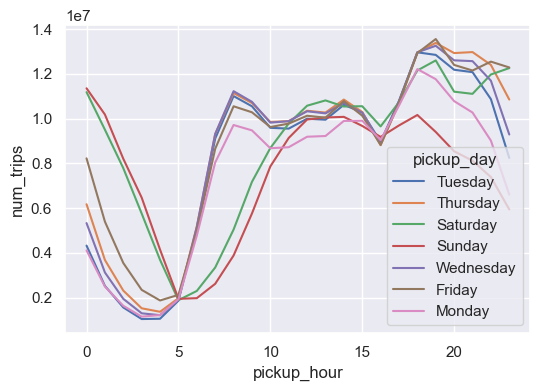

In [8]:
query = f"""
with trip_times as (
    select dayname(tpep_pickup_datetime) pickup_day, hour(tpep_pickup_datetime) pickup_hour
    from '{filename_uber}'
)
select pickup_day, pickup_hour, count(*) num_trips
from trip_times
group by pickup_day, pickup_hour
"""
results = db.sql(query).df()

plt.figure(figsize=(6, 4))
sns.lineplot(data=results, x='pickup_hour', y='num_trips', hue='pickup_day')
plt.show()